In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

<IPython.core.display.Javascript object>


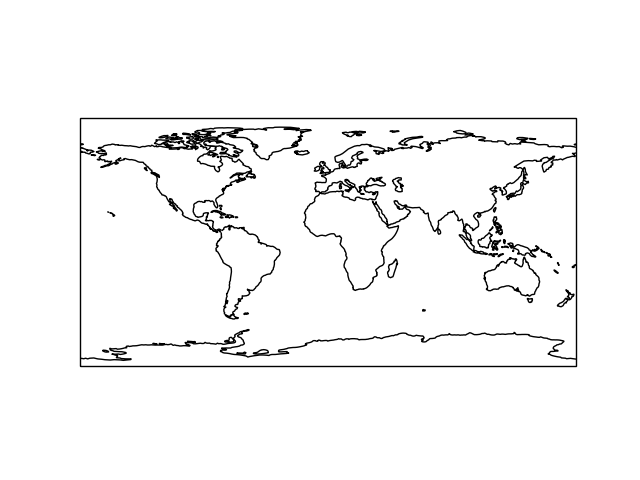

In [3]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

<IPython.core.display.Javascript object>


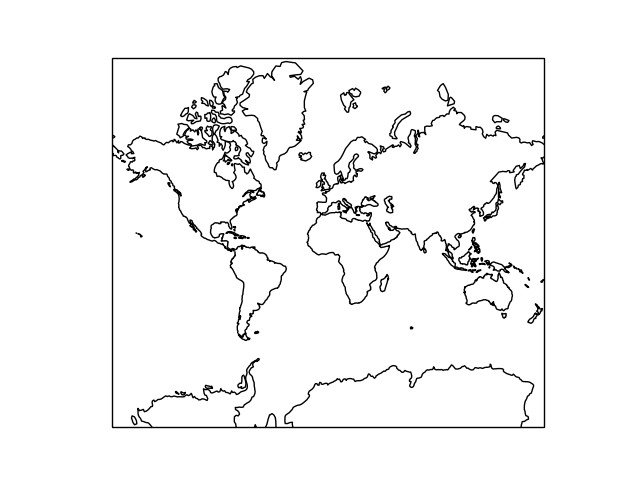

In [5]:
plt.figure()
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

<IPython.core.display.Javascript object>


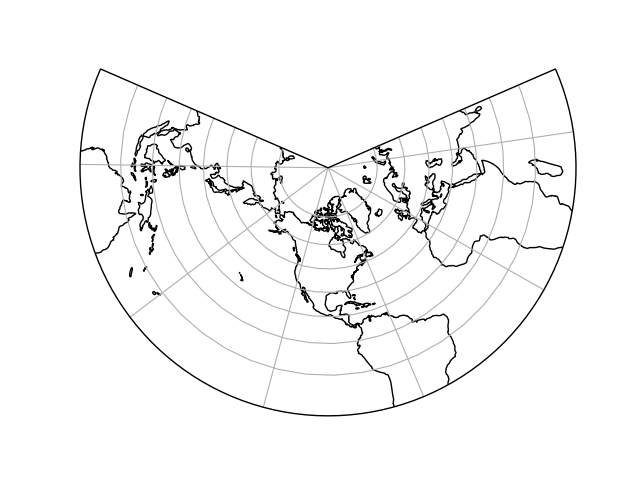

In [7]:
plt.figure()
# Angles on a sphere are right on the maps - areas can be distorted.
ax = plt.axes(projection=ccrs.LambertConformal())
gl = ax.gridlines()
ax.coastlines()

In [10]:
# To see all projections:
# dir(ccrs)

<IPython.core.display.Javascript object>


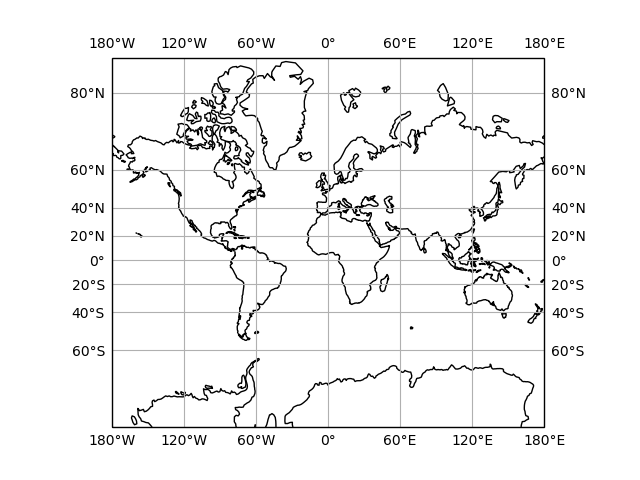

In [15]:
# Mapping code in maptools.py will help
# so not all of this has to be memorized.
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
plt.figure()
ax = plt.axes(projection=ccrs.Mercator())
gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.coastlines()


<IPython.core.display.Javascript object>


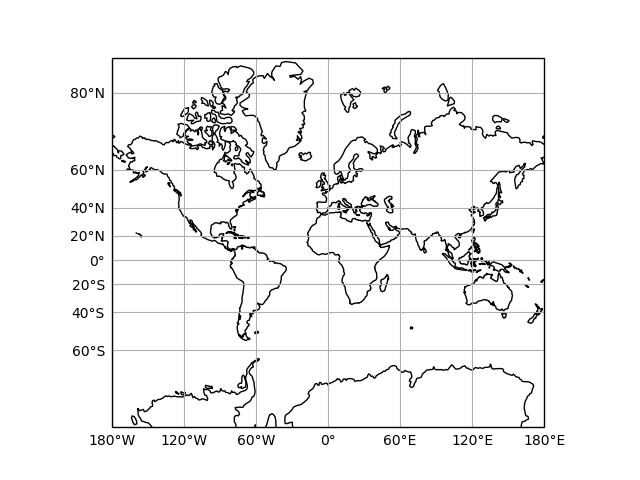

In [17]:
from maptools import make_map
plt.figure()
ax = make_map(ccrs.Mercator())
ax.coastlines()

<IPython.core.display.Javascript object>


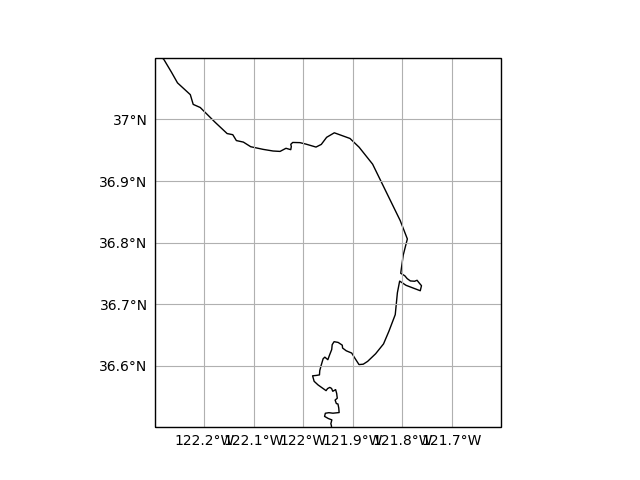

In [20]:
# Now zoom to Monterey Bay
extent = [-122.3, -121.6, 36.5, 37.1]
plt.figure()
ax = make_map(ccrs.Mercator())
ax.set_extent(extent)
# ax.coastlines() # Default is global detail level
ax.coastlines('10m') # finest available - not great for bay-level detail

<IPython.core.display.Javascript object>


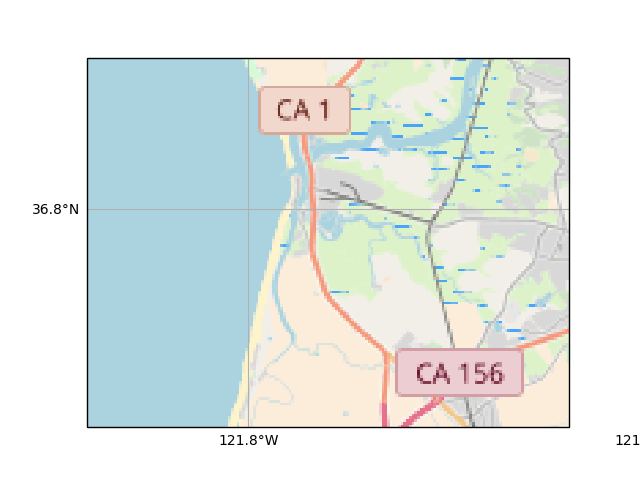

In [26]:
# Can download tiles using Google or Open Street Maps.
import cartopy.io.img_tiles as cimgt
#request = cimgt.GoogleTiles() # Either works
request = cimgt.OSM()
extent = [-122.3, -121.6, 36.5, 37.1]
plt.figure()
ax = make_map(projection = request.crs)
ax.set_extent(extent)
ax.add_image(request, 11) # 10 is a relative scale


In [27]:
# Bathymetric data
from maptools import load_crm_asc
help(load_crm_asc)

Help on function load_crm_asc in module maptools:

load_crm_asc(data_file)
    Load bathymetry data from NOAA Coastal Relief model data set.
    For data in ascii format generated at:
    http://maps.ngdc.noaa.gov/viewers/wcs-client/
    
    Returns:
    z: m x n array of elevation values (negative for depth in ocean, positive on land)
    lon: array of n longitude values
    lat: array of m latitude values
    
    Tom Connolly, MLML (3/2016)



In [28]:
z, lon, lat = load_crm_asc('coastal_relief_model/crm-montereybay.asc')

<IPython.core.display.Javascript object>


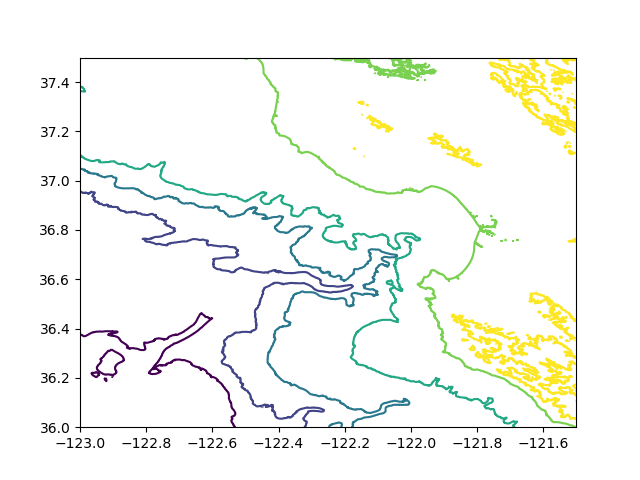

In [30]:
plt.figure()
plt.contour(lon, lat, z)
# Effectively equirectangular

<IPython.core.display.Javascript object>


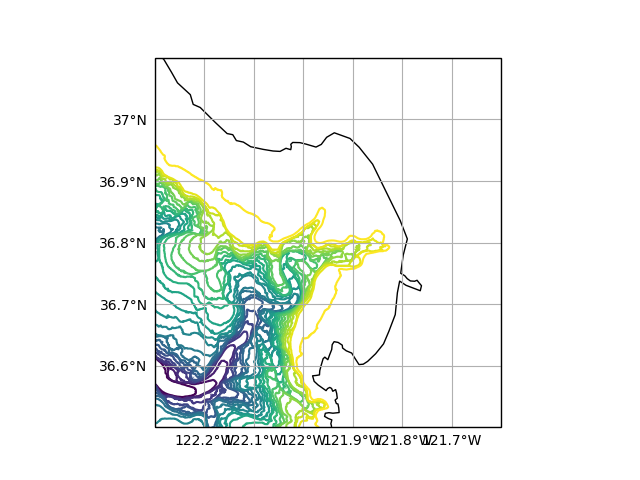

In [33]:
plt.figure()
ax = make_map(projection=ccrs.Mercator())
ax.set_extent(extent)
# Specify mapping of incoming data!
plt.contour(lon, lat, z, np.arange(-2500, 0, 100), transform=ccrs.PlateCarree()) 
ax.coastlines('10m')

In [36]:
# Now zoom to Elkhorn, use data from their site
# Files are GIS shapefiles
from cartopy.io import shapereader

wetshp = shapereader.Reader('Elkhorn_Slough_GIS/WETLAND/wetland.shp')


In [37]:
dir(wetshp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fields',
 '_geometry_factory',
 '_reader',
 'geometries',
 'records']

<IPython.core.display.Javascript object>


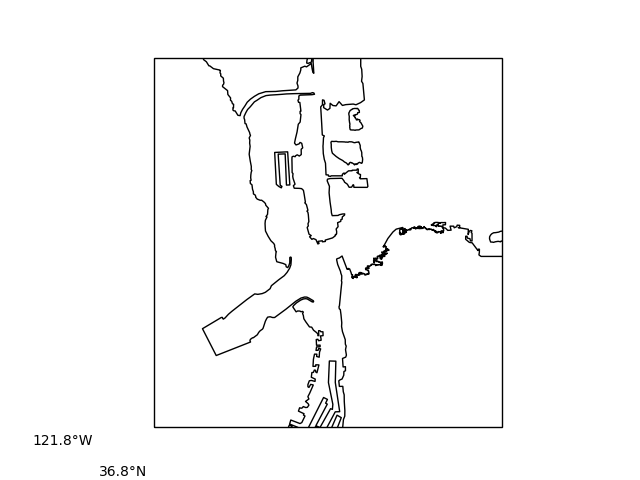

In [40]:
# Loop through all lines in geometries, put on map.
plt.figure()
p = ccrs.UTM(zone=10)  # incoming Elkhorn data projection, meters from a ref. point
ax = make_map(projection=ccrs.Mercator())
ax.set_extent(extent)

for geometry in wetshp.geometries():
    ax.add_geometries(geometry, p, facecolor='None', edgecolor='black')


<IPython.core.display.Javascript object>


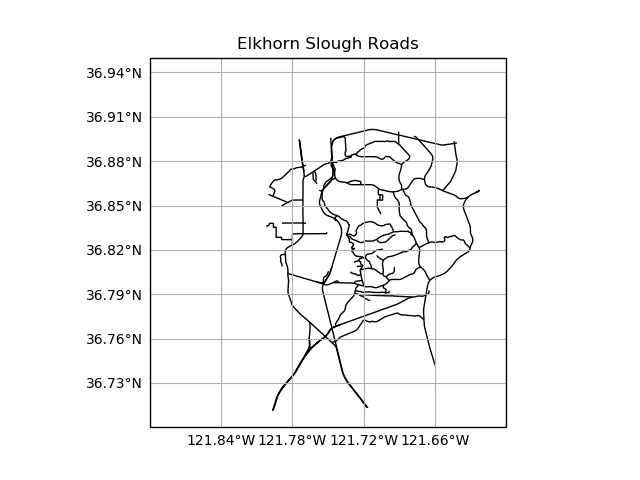

Text(0.5,1,'Elkhorn Slough Roads')

In [51]:
# Repeat with a different shapefile
# Habitats is huge!
#habshp = shapereader.Reader('Elkhorn_Slough_GIS/ELK_Habitats_2009/ELK_Habitats_2009.shp')
roadshp = shapereader.Reader('Elkhorn_Slough_GIS/ROADS/roads.shp')

plt.figure()
p = ccrs.UTM(zone=10)  # incoming Elkhorn data projection, meters from a ref. point
ax = make_map(projection=ccrs.Mercator())
elk_extent = [-121.9, -121.6, 36.7, 36.95]

ax.set_extent(elk_extent)

for geometry in roadshp.geometries():
    ax.add_geometries(geometry, p, facecolor='None', edgecolor='black')
plt.title('Elkhorn Slough Roads')

In [52]:
# For Windows, to run map tiles, must first do
# conda upgrade -c conda-forge pillow